In [1]:
#SQLalchemy Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.sql import func

In [2]:
# Dependencies
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date, timedelta
from  matplotlib.ticker import FuncFormatter

# Climate Analysis (Database Exploration and Refliction)

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()


['measurements', 'stations']

In [5]:
# Assign the [measurements and stations] class to a variable called `measurements and stations`
measurements = Base.classes.measurements
stations = Base.classes.stations

In [6]:
# Create a session
session = Session(engine)

In [7]:
# Display the row's columns and data in dictionary format
prcp_data = session.query(measurements).first()
prcp_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x111c9b438>,
 'date': '2010-01-01',
 'id': 0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

In [8]:
# Display the row's columns and data in dictionary format
station_data = session.query(stations).first()
station_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x111ca5128>,
 'elevation': 3.0,
 'id': 0,
 'latitude': 21.2716,
 'location': None,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

# Precipitation Analysis

In [9]:
df = pd.DataFrame(session.query(measurements.station,
                                measurements.date,
                                measurements.prcp,
                                measurements.tobs).all())
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,0.03,73


In [10]:
prcp_analysis_df = df[['date', 'prcp', 'tobs']]
prcp_analysis_df.head()

,date,prcp,tobs
0,2010-01-01,0.08,65
1,2010-01-02,0.00,63
2,2010-01-03,0.00,74
3,2010-01-04,0.00,76
4,2010-01-06,0.03,73


In [11]:
prcp_year_df = prcp_analysis_df[(prcp_analysis_df['date'] > '2016-08-23') & (prcp_analysis_df['date'] <= '2017-08-23')]
prcp_year_df = prcp_year_df.sort_values(by='date')

In [12]:
prcp_year_df.head()

,date,prcp,tobs
2364,2016-08-24,0.08,79
8825,2016-08-24,0.00,78
14608,2016-08-24,2.15,77
7331,2016-08-24,2.28,80
5091,2016-08-24,2.15,76


In [13]:
prcp_year_df.dtypes 

date     object
prcp    float64
tobs      int64
dtype: object

In [14]:
len(prcp_year_df)

2223

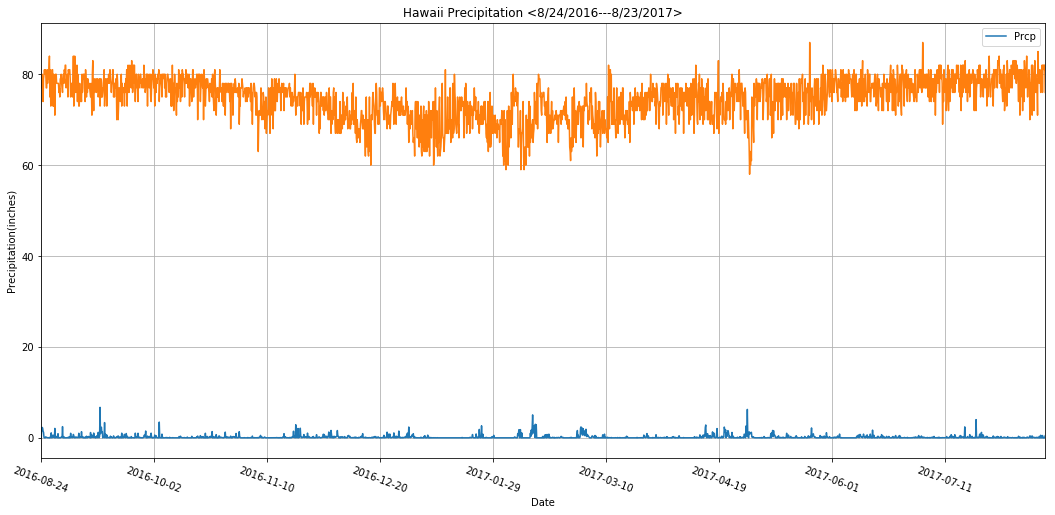

In [15]:
#Plot the dataframe to a horizontal bar chart
prcp_year_df.plot(x='date', figsize = (18,8), rot = 340)
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Precipitation(inches)")
plt.title("Hawaii Precipitation <8/24/2016---8/23/2017>")
plt.legend(["Prcp"])
plt.show()

In [16]:
df.describe()

,prcp,tobs
count,19550.000000,19550.000000
mean,0.158862,73.097954
std,0.456102,4.523527
min,0.000000,53.000000
25%,0.000000,70.000000
50%,0.010000,73.000000
75%,0.110000,76.000000
max,11.530000,87.000000


# Station Analysis

In [17]:
# total number of stations 
station_count = session.query(stations.station).count()
station_count

9

In [18]:
top_active_stations = session.query(stations.station,
                            stations.name,
                            measurements.station,
                            func.count(measurements.tobs)).filter(stations.station == measurements.station).group_by(measurements.station).order_by(func.count(measurements.tobs).desc()).all()

In [19]:
top_active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 'USC00519281', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 'USC00519397', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 'USC00513117', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'USC00514830',
  2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 'USC00517948', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)]

In [20]:
highest_active_station = top_active_stations[0][0:2]

In [21]:
highest_active_station

('USC00519281', 'WAIHEE 837.5, HI US')

In [22]:
#retrieving the last 12 months' temperature observation (tobs)
top_active_observation = session.query(measurements.station,
                                       measurements.tobs).filter(measurements.station == highest_active_station[0],
                                                                 measurements.date > '2016-08-23').all()

In [23]:
len(top_active_observation)

351

In [24]:
top_active_observation[0]

('USC00519281', 77)

In [25]:
# loop = [x[:] for x in targeted_list]
temperature = [x[1] for x in top_active_observation]
temperature[0]

77

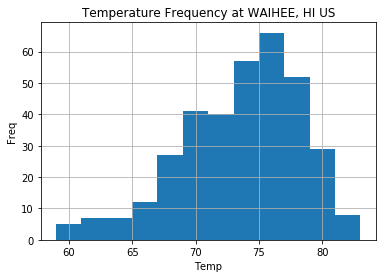

In [26]:
#ploting...
                
plt.hist(temperature, bins=12) # how does the hist choose to count freq for different timps
plt.title("Temperature Frequency at WAIHEE, HI US")
plt.grid(True)
plt.figsize = (18,8)
plt.xlabel("Temp")
plt.ylabel("Freq")
plt.show()

# Temperature Analysis

In [27]:
temp_analysis_df = df[['date', 'prcp', 'tobs']]
prcp_year_df = temp_analysis_df[(prcp_analysis_df['date'] > '2016-08-23') & (prcp_analysis_df['date'] <= '2017-08-23')]
temp_year_df = prcp_year_df.sort_values(by='date')
temp_year_df.head()

,date,prcp,tobs
2364,2016-08-24,0.08,79
8825,2016-08-24,0.00,78
14608,2016-08-24,2.15,77
7331,2016-08-24,2.28,80
5091,2016-08-24,2.15,76


In [28]:
#def foo (s1, s2)
#prcp_yr_df= ...>s1 and ...<s2
#return prcp_yr_df.min, prcp_yr_df.max, .mean()

In [29]:
def calc_temps(starting_date, ending_date):
    temp = temp_year_df[(prcp_analysis_df['date'] > starting_date) & (prcp_analysis_df['date'] <= ending_date)]
    temp_max = temp.tobs.max()
    temp_min = temp.tobs.min()
    temp_mean = temp.tobs.mean()
    return (temp_max, temp_min, temp_mean)

temp_max, temp_min, temp_mean = calc_temps("2017-03-10", "2017-03-20")    

/Users/abdullahalfai/anaconda3/envs/pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [30]:
temp_max, temp_min, temp_mean

(82, 65, 72.21666666666667)

In [31]:
plt.bar(0, temp_mean, color='purple', alpha=.25, yerr=[temp_max - temp_mean])
plt.align = 'center'
plt.figsize = (18,8)
plt.grid(True)
plt.ylabel("Temp")
plt.title(" Avrg Temp")

Text(0.5,1,' Avrg Temp')

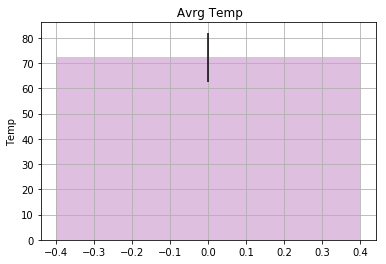

In [32]:
plt.show()